In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("restaurants.csv")

In [3]:
df.head()

,place_id,name,latitude,longitude,rating,number_of_reviews,affluence,address
0,ChIJx1i4PyCtqjARq5eQI4YeUFE,"Jamal Store, Joykul Bazaar",22.604275,90.094718,0.0,NaN,NaN,"Unnamed Road, Kawkhali, Bangladesh"
1,ChIJjyA9oZytqjAR6apb48G7hSY,Salma Varaitis Store,22.619158,90.105594,5.0,1.0,NaN,"Kawkhali bowlakanda, কাউখালি, Bangladesh"
2,ChIJFYwq-zkLADoRf_tn0mu_rOQ,হাজী বিরিয়ানি হাউজ,22.289046,89.958509,5.0,1.0,NaN,"Charkhali - Mathbaria – Patharghata Rd, Mathba..."
3,ChIJPYyqnw8LADoRycl3-GrLje0,নিউ মুসলিম সুইটস এণ্ড বেকারি,22.288710,89.958482,5.0,4.0,NaN,"সদর রোড, Mathbaria, Bangladesh"
4,ChIJXU_rTB8LADoRYdOJ2LC_Vo4,মেসার্স সততা হোটেল এন্ড রেস্টুরেন্ট,22.286784,89.958116,0.0,NaN,NaN,"7XP5+P69, Mathbaria, Bangladesh"


In [4]:
df.describe()

,latitude,longitude,rating,number_of_reviews,affluence
count,12703.000000,12703.000000,12702.000000,10037.000000,1770.000000
mean,23.781365,90.328629,3.226555,205.763176,1.879661
std,0.986665,0.984722,1.785468,801.054157,0.558286
min,20.856284,88.128098,0.000000,1.000000,1.000000
25%,23.106565,89.584881,3.000000,2.000000,2.000000
50%,23.751747,90.386950,4.000000,10.000000,2.000000
75%,24.387814,90.877606,4.300000,82.000000,2.000000
max,26.494126,92.438711,5.000000,17655.000000,4.000000


### Checking duplicate values

In [5]:
dup = df.duplicated().sum()
print(f"There are {dup} duplicated rows present")

There are 1945 duplicated rows present


### Remove the duplicate rows

In [6]:
df.drop_duplicates(keep="first", inplace=True)

In [7]:
# again checking the results
dup = df.duplicated().sum()
print(f"Now there are {dup} duplicated rows present")

Now there are 0 duplicated rows present


### Checking Null values

In [8]:
df.isnull().sum()

place_id                0
name                    0
latitude                0
longitude               0
rating                  1
number_of_reviews    2536
affluence            9730
address                 0
dtype: int64

Here we see that we have 1 missing values in rating column, 2536 missing values in number_of_reviews column and 9730 missing values in affluence column

In [9]:
df.count().max()

10758

Here we can see that we have a total of 10758 rows maximum and most of the rows are missing in the affluence column so we decided to drop the column

In [10]:
df = df.drop('affluence', axis=1)

Next, we replace missing value of rating column with the mean value. 

In [11]:
round(df['rating'].mean())

3

In [12]:
df[df['rating'].isnull() == True]  

,place_id,name,latitude,longitude,rating,number_of_reviews,address
11931,ChIJB21VbKDfrDARD2_wpGSbZ-o,সোহেল এর চা দোকান,22.306622,91.790417,NaN,NaN,"8Q4R+J5V, Chattogram, Bangladesh"


In [13]:
df['rating'] = df['rating'].fillna(round(df['rating'].mean()))

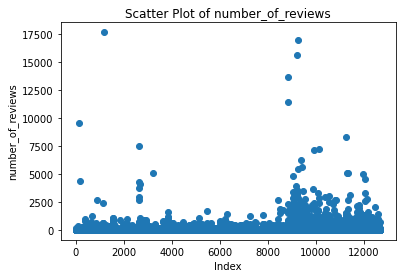

In [14]:
import matplotlib.pyplot as plt 
plt.scatter(df.index, df['number_of_reviews'])
plt.xlabel('Index')
plt.ylabel('number_of_reviews')
plt.title('Scatter Plot of number_of_reviews')
plt.show()

In [15]:
df['number_of_reviews'].mean()

112.18803210897592

We see that we could not find any reviews for some restaurants. So we consider the number of reviews for those restaurants to be zero

In [16]:
df['number_of_reviews'] = df['number_of_reviews'].fillna(0)

### Checking location

In [20]:
df[df['address'].str.contains('Bangladesh')==False].head(2)

,place_id,name,latitude,longitude,rating,number_of_reviews,address
2249,ChIJM3pmh-oZUzcRxEj0i0X72NM,Juice🍹& Spice🌶,23.003974,91.729881,0.0,0.0,"2P3H+HXJ, Sabroom, Tripura 799145, India"
2252,ChIJ2dxRyT0ZUzcRVlumPmgbV3c,Pushpa fast food,23.000829,91.727325,4.7,9.0,"Pushpa fast food chotokhil Rd, opposite of bag..."


In [21]:
df[df['address'].str.contains('Bangladesh')==False].count()

place_id             62
name                 62
latitude             62
longitude            62
rating               62
number_of_reviews    62
address              62
dtype: int64

We see that there are some resturant outside of Bangladesh. So we need to remove them. 

In [23]:
df = df[df['address'].str.contains('Bangladesh')==True]
df.reset_index(drop=True, inplace=True)

In [27]:
df['name'].head()

0             Jamal Store, Joykul Bazaar
1                   Salma Varaitis Store
2                     হাজী বিরিয়ানি হাউজ
3           নিউ মুসলিম সুইটস এণ্ড বেকারি
4    মেসার্স সততা হোটেল এন্ড রেস্টুরেন্ট
Name: name, dtype: object

We see that some of the resturant name contains bangla. So we need to separate them. 

In [32]:
import re
reg = re.compile(r'[a-zA-Z]')
df["name_type"] = df["name"].apply(lambda x: "English" if reg.match(x) else "Bangla")
df_english = df[df['name_type'] == "English"]
df_bangla  = df[df['name_type'] == "Bangla"]  

In [43]:
df_english['name'].head()

0     Jamal Store, Joykul Bazaar
1           Salma Varaitis Store
5               Sharif food fair
11       Food Club The Caterer's
13    New Muslim Sweets & bekare
Name: name, dtype: object

In [44]:
df_bangla['name'].head()

2                              হাজী বিরিয়ানি হাউজ
3                    নিউ মুসলিম সুইটস এণ্ড বেকারি
4             মেসার্স সততা হোটেল এন্ড রেস্টুরেন্ট
6                            সোহেল রানা কাটোল ফাম
7    মেসার্স সৌখিন ষ্টীল এন্ড পার্টেক্স ফার্নিচার
Name: name, dtype: object

In [47]:
df.columns

Index(['place_id', 'name', 'latitude', 'longitude', 'rating',
       'number_of_reviews', 'address', 'name_type'],
      dtype='object')

### Recommendation System - Part I
Restaurants popularity based recommendation system targeted at new customers

In [52]:
popular_restaurants = pd.DataFrame(df.groupby(['name'])['rating'].count())
most_popular = popular_restaurants.sort_values('rating', ascending=False)
most_popular.head(10)

,rating
name,
Bismillah Hotel & Restaurant,18
Bismillah Hotel,15
ভাই ভাই হোটেল,15
Restaurant,11
বিসমিল্লাহ হোটেল,10
Bismillah Restaurant,10
Kazi Farms Kitchen,7
ভাই ভাই হোটেল এন্ড রেস্টুরেন্ট,6
Bhai Bhai Hotel & Restaurant,6


In [64]:
most_popular.iloc[4].name

'বিসমিল্লাহ হোটেল'

In [56]:
a = df[df['name']=="বিসমিল্লাহ হোটেল"]

In [57]:
a['address']

201     Companiganj - Nabinagar Rd, Nabinagar, Bangladesh
443                    Unnamed Road, Haziganj, Bangladesh
2678                      M566+9R3, Nawabganj, Bangladesh
3901                         বাজার উপজেলা রোড, Bangladesh
4188                          Sadhur Bazar Rd, Bangladesh
4587                Unnamed Road, Sharankhola, Bangladesh
4912                      G5R8+84V, Jhenaidah, Bangladesh
5426    College Bus Stand, সাতক্ষীরা - কলারোয়া সড়ক, ...
7486    Sundarganj - Chander Mor Rd, Sundarganj, Bangl...
8031                       ব্রাক মোড়, Kursha, Bangladesh
Name: address, dtype: object

### Recommendation System - Part II

In [118]:
from sklearn.cluster import KMeans
X = df[['rating', 'number_of_reviews']]

k = 5  
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

In [120]:
df['cluster'] = kmeans.labels_

In [121]:
# Calculate the average rating for each cluster
cluster_ratings = df.groupby('cluster')['rating'].mean().reset_index()

# Sort the clusters based on average rating in descending order
sorted_clusters = cluster_ratings.sort_values('rating', ascending=False)

In [122]:
sorted_clusters

,cluster,rating
2,2,4.120000
4,4,4.105051
3,3,4.000708
1,1,3.994118
0,0,3.074190


In [138]:
# Recommend the top-rated restaurant from each cluster
recommendations = []
for i, row in sorted_clusters.iterrows():
    cluster = row['cluster']
    top_restaurant = df[df['cluster'] == cluster].nlargest(1, 'rating')
    print(top_restaurant)
    recommendations.append(top_restaurant)

                         place_id                 name   latitude  longitude  \
8817  ChIJh8lweytVUDcRXzCQrpgEXxE  Pach Vai Restaurant  24.894831  91.866458   

      rating  number_of_reviews                                address  \
8817     4.4            11459.0  Jallarpar Rd, Sylhet 3100, Bangladesh   

     name_type  cluster  
8817   English        2  
                         place_id              name   latitude  longitude  \
9103  ChIJtV6eiAvHVTcRCxBoKR6ibfE  Yum Cha District  23.790174  90.408053   

      rating  number_of_reviews  \
9103     4.5             2814.0   

                                                address name_type  cluster  
9103  House 25, 2nd Floor, BFC Building, Rd No. 11, ...   English        4  
                        place_id                                    name  \
362  ChIJYWc2nJL8VDcRYg9t_c_BfCw  রসুইঘর রেষ্টুরেন্ট এন্ড পার্টি সেন্টার   

      latitude  longitude  rating  number_of_reviews  \
362  23.226131   90.65997     4.7              81

In [139]:
# Print the recommended restaurants
print("Recommended Restaurants:")
for recommendation in recommendations:
    print(f"{recommendation['name'].values[0]} (Rating: {recommendation['rating'].values[0]})")

Recommended Restaurants:
Pach Vai Restaurant (Rating: 4.4)
Yum Cha District (Rating: 4.5)
রসুইঘর রেষ্টুরেন্ট এন্ড পার্টি সেন্টার (Rating: 4.7)
Takeout Banani (Rating: 4.4)
Salma Varaitis Store (Rating: 5.0)
